**Import Data**

In [ ]:
 import zipfile

# Download zip file
 !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

 # Unzip file
 zip_ref = zipfile.ZipFile('pizza_steak.zip')
 zip_ref.extractall()
 zip_ref.close()

--2022-09-20 05:09:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   136MB/s    in 0.8s    

2022-09-20 05:09:06 (136 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



**Inspect the File**

In [ ]:
!ls pizza_steak

test  train


In [ ]:
# Identify the path
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# list number of files in directory
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'.")

There are 2 directories and 0 in 'pizza_steak'.
There are 2 directories and 0 in 'pizza_steak/train'.
There are 0 directories and 750 in 'pizza_steak/train/pizza'.
There are 0 directories and 750 in 'pizza_steak/train/steak'.
There are 2 directories and 0 in 'pizza_steak/test'.
There are 0 directories and 250 in 'pizza_steak/test/pizza'.
There are 0 directories and 250 in 'pizza_steak/test/steak'.


In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

In [ ]:
# Number of steak training images
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
print(class_names)

['pizza' 'steak']


**View an image**

In [ ]:
 import matplotlib.pyplot as plt
 import matplotlib.image as mpimg
 import random

 def view_random_image(target_dir, target_class):
   # create target directory
   target_folder = target_dir + '/' + target_class

   random_image = random.sample(os.listdir(target_folder), 1)

   img = mpimg.imread(target_folder + '/' + random_image[0])

   plt.imshow(img)

   plt.title(target_class)
   plt.axis('off');

   print(f"Image shape: {img.shape}")
   return img

Image shape: (512, 512, 3)


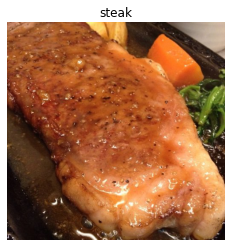

In [ ]:
# view a random image from the data set
img = view_random_image(target_dir = 'pizza_steak/train/',
                  target_class='steak')

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


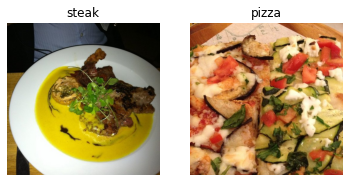

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak') # View an image from the steak training set
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza') # View an image from the pizza training set

In [ ]:
# view image data
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[175, 112,  81],
        [185, 122,  91],
        [188, 125,  94],
        ...,
        [215, 191, 167],
        [214, 190, 166],
        [210, 186, 162]],

       [[171, 108,  77],
        [177, 114,  83],
        [177, 114,  83],
        ...,
        [213, 189, 165],
        [213, 189, 165],
        [210, 186, 162]],

       [[166, 103,  72],
        [169, 106,  75],
        [168, 105,  74],
        ...,
        [210, 186, 162],
        [211, 187, 163],
        [210, 186, 162]],

       ...,

       [[ 20,  10,   9],
        [ 31,  21,  20],
        [ 34,  24,  23],
        ...,
        [ 19,  11,   8],
        [ 18,  10,   7],
        [ 16,   8,   5]],

       [[ 25,  16,  11],
        [ 32,  22,  20],
        [ 32,  22,  20],
        ...,
        [ 20,  12,   9],
        [ 18,  10,   7],
        [ 17,  10,   4]],

       [[ 25,  16,  11],
        [ 23,  14,   9],
        [ 26,  16,  14],
        ...,
        [ 20,  12,   

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
# Normalized image data
img/255.

array([[[0.68627451, 0.43921569, 0.31764706],
        [0.7254902 , 0.47843137, 0.35686275],
        [0.7372549 , 0.49019608, 0.36862745],
        ...,
        [0.84313725, 0.74901961, 0.65490196],
        [0.83921569, 0.74509804, 0.65098039],
        [0.82352941, 0.72941176, 0.63529412]],

       [[0.67058824, 0.42352941, 0.30196078],
        [0.69411765, 0.44705882, 0.3254902 ],
        [0.69411765, 0.44705882, 0.3254902 ],
        ...,
        [0.83529412, 0.74117647, 0.64705882],
        [0.83529412, 0.74117647, 0.64705882],
        [0.82352941, 0.72941176, 0.63529412]],

       [[0.65098039, 0.40392157, 0.28235294],
        [0.6627451 , 0.41568627, 0.29411765],
        [0.65882353, 0.41176471, 0.29019608],
        ...,
        [0.82352941, 0.72941176, 0.63529412],
        [0.82745098, 0.73333333, 0.63921569],
        [0.82352941, 0.72941176, 0.63529412]],

       ...,

       [[0.07843137, 0.03921569, 0.03529412],
        [0.12156863, 0.08235294, 0.07843137],
        [0.13333333, 0

**Create train and test data sets**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224), # change image size/shape
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Model 1 is a simple example of a neural network. This model performs no better than random chance.**

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 1.6106 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 150528)            0         
                                                                 
 dense_32 (Dense)            (None, 4)                 602116    
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


**Model 2 increases the number of trainable parameters by increasing the dimensionality of the output space. This does significantly increase the accuracy of the model.** 

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 3.0788 - accuracy: 0.6387 - val_loss: 0.8105 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 1.3239 - accuracy: 0.7000 - val_loss: 1.5252 - val_accuracy: 0.6460
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.7150 - accuracy: 0.7293 - val_loss: 0.4417 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4328 - accuracy: 0.8080 - val_loss: 0.6821 - val_accuracy: 0.6400
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4058 - accuracy: 0.8253 - val_loss: 0.7706 - val_accuracy: 0.6940


In [ ]:
model_2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 150528)            0         
                                                                 
 dense_35 (Dense)            (None, 100)               15052900  
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from pyparsing.core import StringEnd

**Model 3 is a small 3 layer CNN**

In [ ]:

model_3 = Sequential([
      Conv2D(filters=10,
             kernel_size=3,
             strides=1,
             padding='valid',
             activation='relu',
             input_shape=(224,224,3)), # input layer
      Conv2D(10,3,activation='relu'),
      Conv2D(10,3,activation='relu'),
      Flatten(),
      Dense(1,activation='sigmoid') # output layer
])



In [ ]:
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_49 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_50 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_21 (Flatten)        (None, 475240)            0         
                                                                 
 dense_39 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


**Model 3 improves on Model 2, even though it greatly reduces the number of trainable parameters.**

In [ ]:
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 1.2619 - accuracy: 0.6753 - val_loss: 0.4203 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4210 - accuracy: 0.8067 - val_loss: 0.3946 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3097 - accuracy: 0.8767 - val_loss: 0.3733 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1774 - accuracy: 0.9373 - val_loss: 0.5446 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0912 - accuracy: 0.9713 - val_loss: 0.5289 - val_accuracy: 0.8020


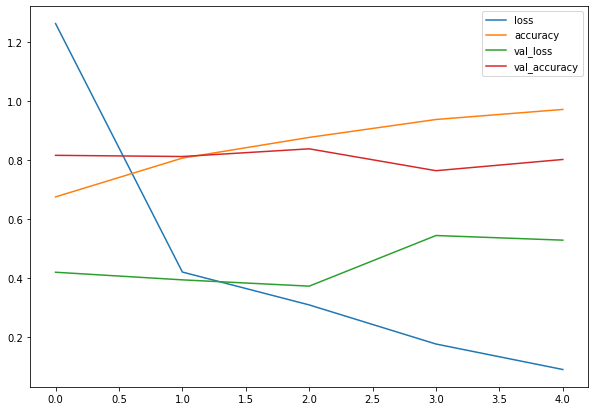

In [ ]:
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(10,7)) #plot loss and accuracy of model

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

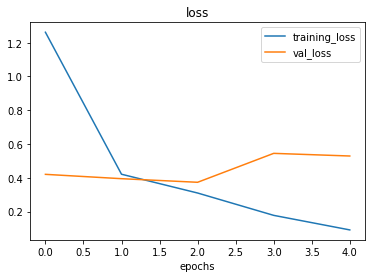

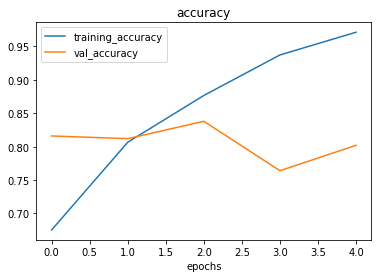

In [ ]:
plot_loss_curves(history_3)

#some overfitting appearing in this model

**Model 4 adds in 2 MaxPool layers to reduce overfitting**

In [ ]:
model_4 = Sequential([
      Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10,3,activation='relu'),
      MaxPool2D(),
      Conv2D(10,3,activation='relu'),
      MaxPool2D(),
      Flatten(),
      Dense(1,activation='sigmoid')
])



In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 0.5803 - accuracy: 0.6840 - val_loss: 0.4415 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4573 - accuracy: 0.7987 - val_loss: 0.3945 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4259 - accuracy: 0.8140 - val_loss: 0.3904 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3957 - accuracy: 0.8253 - val_loss: 0.3325 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3682 - accuracy: 0.8380 - val_loss: 0.3663 - val_accuracy: 0.8360


In [ ]:
model_4.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 26, 26, 10)     

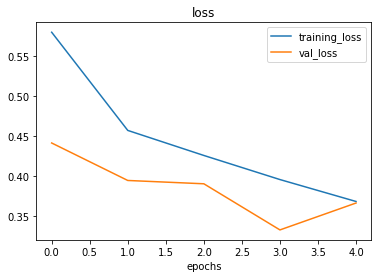

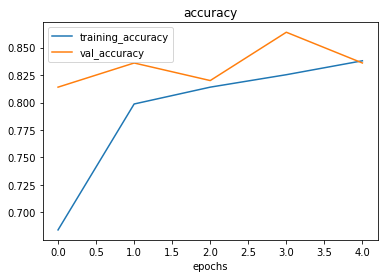

In [ ]:
plot_loss_curves(history_4)

#this model slightly improved accuracy while reducing overfitting.

**Data Augmentation: we will attempt to reduce overfitting even more by augmenting the training data**


In [ ]:
#Augment data with rotation, shear, zoom, shift, and flip
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) #False for image example below, Change to true before use
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) #False for image example below, Change to true before use

print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 13


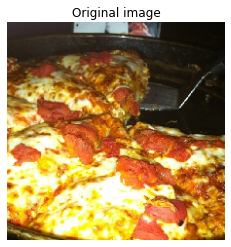

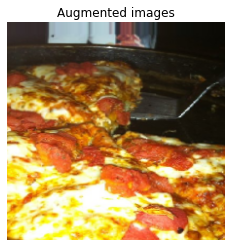

In [ ]:
#Randomly choose an image and show the original and augmented version
random_number = random.randint(0,31)
print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented images')
plt.axis(False);


In [ ]:
#Reshuffling training data
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) 

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


**Model 5 is identical to Model 4 but uses augmented data**

In [ ]:
model_5 = Sequential([
          Conv2D(10,3,activation='relu'),
          MaxPool2D(pool_size=2),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(pool_size=2),
          Conv2D(10,3,activation='relu'),
          MaxPool2D(pool_size=2),
          Flatten(),
          Dense(1,activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 454ms/step - loss: 0.6536 - accuracy: 0.6180 - val_loss: 0.5041 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5322 - accuracy: 0.7213 - val_loss: 0.4105 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 21s 448ms/step - loss: 0.4823 - accuracy: 0.7800 - val_loss: 0.3685 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4571 - accuracy: 0.7873 - val_loss: 0.3467 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4353 - accuracy: 0.8053 - val_loss: 0.4462 - val_accuracy: 0.7800


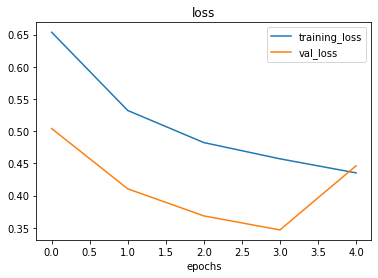

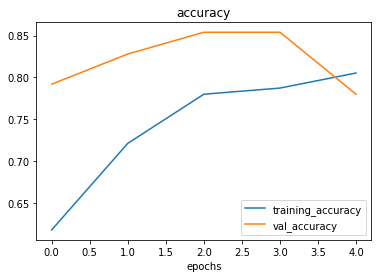

In [ ]:
plot_loss_curves(history_5)

**Model 6 no longer augments data and adds additional Conv2D layers. This structure matches the Tiny VGG: https://poloclub.github.io/cnn-explainer/**

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5932 - accuracy: 0.6560 - val_loss: 0.4606 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4767 - accuracy: 0.7920 - val_loss: 0.4395 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4147 - accuracy: 0.8247 - val_loss: 0.3673 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3927 - accuracy: 0.8353 - val_loss: 0.3950 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3628 - accuracy: 0.8500 - val_loss: 0.3856 - val_accuracy: 0.8340


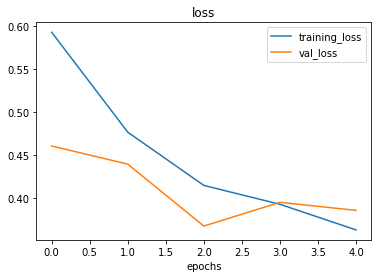

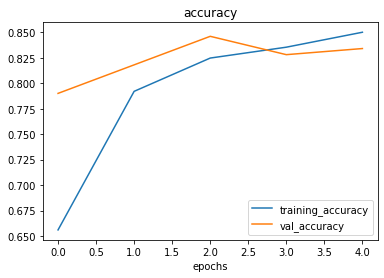

In [ ]:
plot_loss_curves(history_6)

# Overfitting is greatly reduced

In [ ]:
model_6.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_58 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_60 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                